In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_customer_address = pd.read_csv('data/df_customer_address.csv')
df_customer_demographics = pd.read_csv('data/df_customer_demographics.csv')
df_new_customers = pd.read_csv('data/df_new_customers.csv')
df_transactions = pd.read_csv('data/df_transactions.csv')

In [3]:
df_merged = df_transactions.merge(df_customer_demographics, on='customer_id').merge(df_customer_address, on = 'customer_id')
df_merged.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_industry_category,wealth_segment,owns_car,tenure,age,address,postcode,state,country,property_valuation
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,63.0,984 Hoepker Court,3064,VIC,Australia,6
1,11065,1,2950,2017-10-16,0.0,Approved,Giant Bicycles,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,63.0,984 Hoepker Court,3064,VIC,Australia,6
2,18923,62,2950,2017-04-26,0.0,Approved,Solex,Standard,medium,medium,...,Financial Services,Mass Customer,Yes,10.0,63.0,984 Hoepker Court,3064,VIC,Australia,6
3,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Health,Mass Customer,Yes,10.0,39.0,4 Shopko Circle,2196,NSW,Australia,5
4,6862,4,3120,2017-10-05,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Health,Mass Customer,Yes,10.0,39.0,4 Shopko Circle,2196,NSW,Australia,5


In [4]:
df_merged.nunique()

transaction_id                         19968
product_id                               101
customer_id                             3489
transaction_date                         364
online_order                               2
order_status                               2
brand                                      6
product_line                               4
product_class                              3
product_size                               3
list_price                               294
standard_cost                            100
product_first_sold_date                  100
profits                                  100
profit%                                  100
first_name                              2835
last_name                               3264
gender                                     3
past_3_years_bike_related_purchases      100
DOB                                     3047
job_title                                196
job_industry_category                     10
wealth_seg

In [5]:
df_merged.dropna(subset='brand', axis=0, inplace=True)
df_merged.shape

(19773, 31)

In [6]:
df_merged.drop_duplicates(ignore_index= True, inplace=True)

<Axes: xlabel='job_industry_category', ylabel='profit%'>

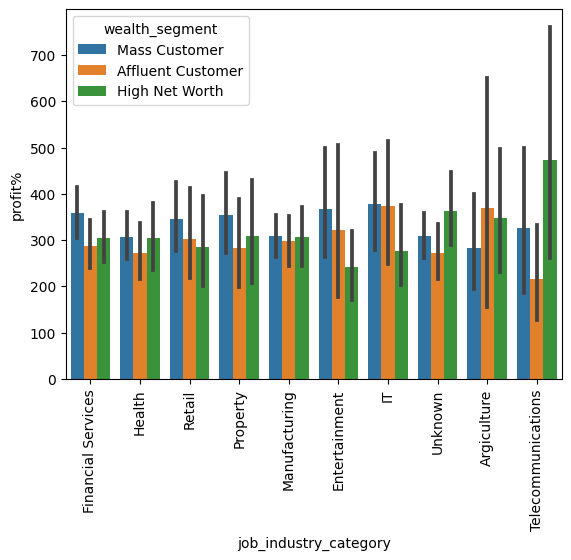

In [7]:
chart = sns.barplot(x=df_merged['job_industry_category'], y= df_merged['profit%'], hue= df_merged['wealth_segment'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
chart

<Axes: xlabel='job_industry_category', ylabel='profit%'>

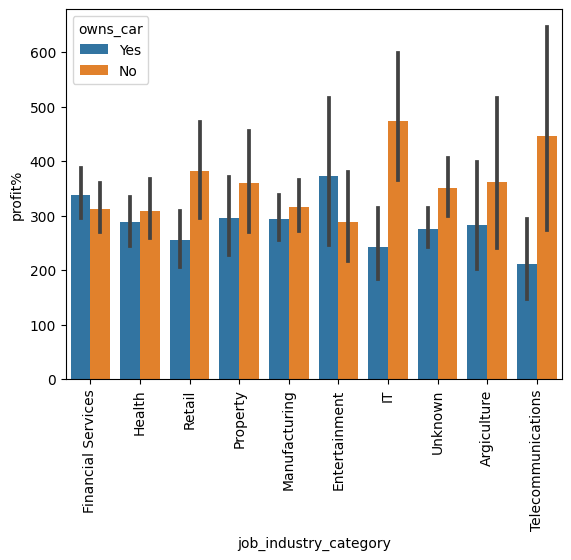

In [8]:
chart3 = sns.barplot(x=df_merged['job_industry_category'], y= df_merged['profit%'], hue= df_merged['owns_car'])
chart3.set_xticklabels(chart3.get_xticklabels(), rotation=90)
chart3

<Axes: xlabel='wealth_segment'>

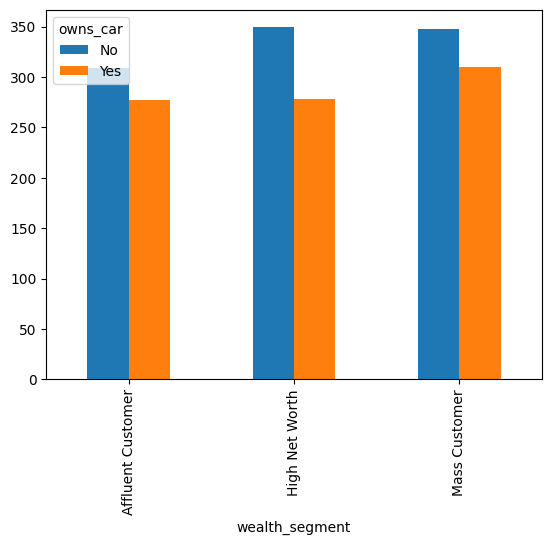

In [9]:
chart3 = df_merged.groupby(['wealth_segment','owns_car'])['profit%'].mean().unstack().plot.bar(rot = 90)
#sns.set_xticklabels(chart3.get_xticklabels(), rotation=90)
chart3

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

Text(0.5, 1.0, 'Old customers')

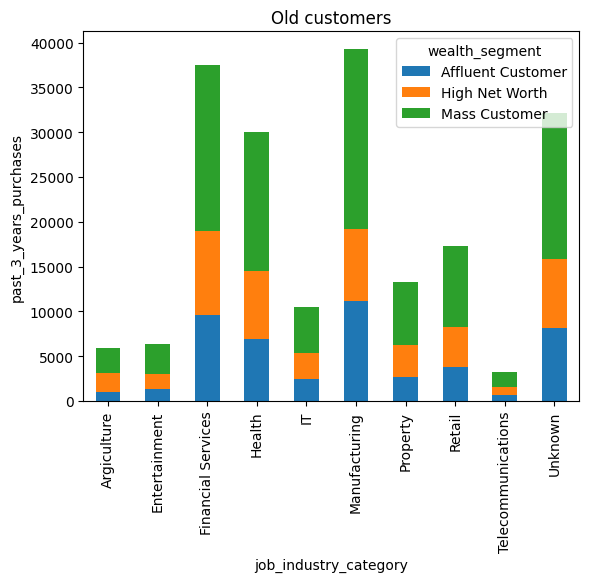

In [15]:
df_customer_demographics.groupby(['job_industry_category','wealth_segment'])['past_3_years_bike_related_purchases'].sum().unstack().plot(kind = 'bar', stacked=True)
plt.ylabel('past_3_years_purchases')
plt.title('Old customers')

Text(0.5, 1.0, 'New customers')

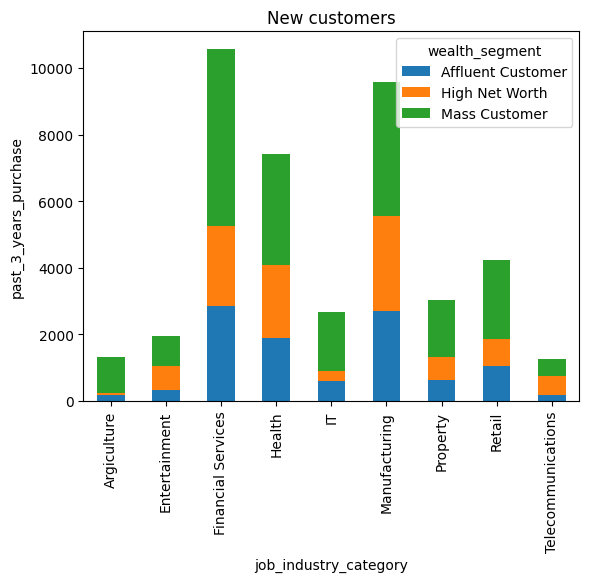

In [20]:
df_new_customers.groupby(['job_industry_category','wealth_segment'])['past_3_years_bike_related_purchases'].sum().unstack().plot(kind = 'bar', stacked=True)
plt.ylabel('past_3_years_purchase')
plt.title('New customers')

In [19]:
df_customer_demographics.groupby(['job_industry_category','wealth_segment'])['past_3_years_bike_related_purchases'].sum().unstack()

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
job_industry_category,,,
Argiculture,1055,2079,2811
Entertainment,1383,1610,3327
Financial Services,9593,9383,18517
Health,6908,7598,15548
IT,2454,2880,5137
Manufacturing,11183,7981,20108
Property,2650,3628,7016
Retail,3769,4545,8987
Telecommunications,665,919,1660


<Axes: xlabel='brand', ylabel='profit%'>

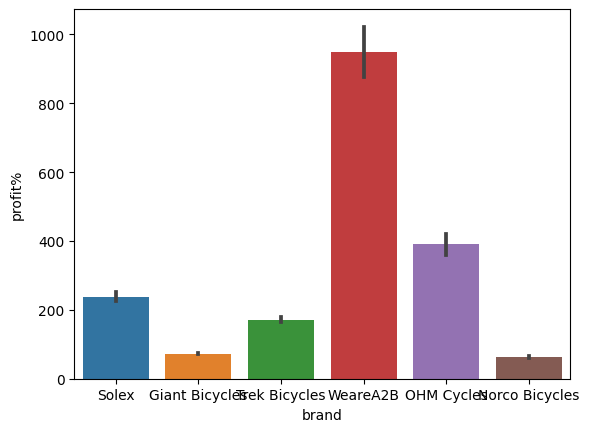

In [22]:
sns.barplot(x=df_merged['brand'], y = df_merged['profit%'])

<Axes: xlabel='job_industry_category', ylabel='profits'>

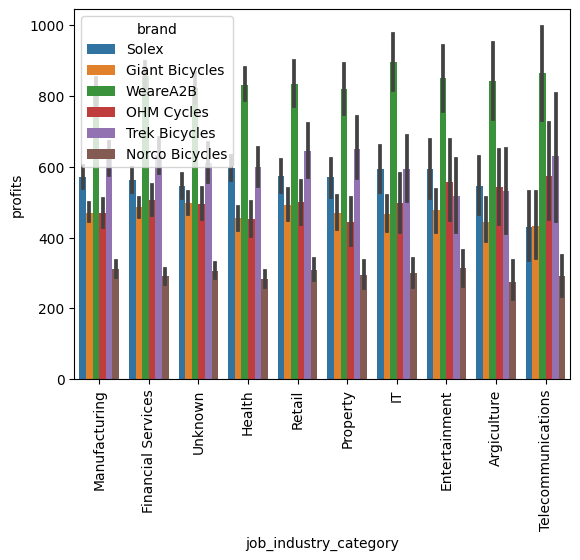

In [31]:
chart4 = sns.barplot(x= df_merged['job_industry_category'],y= df_merged['profit%'], hue = df_merged['brand'], order=df_merged['job_industry_category'].value_counts().index, hue_order=df_merged['brand'].value_counts().index)
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=90)
chart4

<Axes: xlabel='state', ylabel='profit%'>

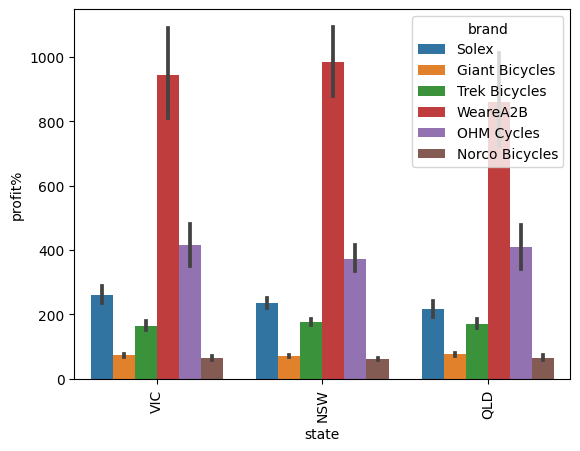

In [30]:
chart4 = sns.barplot(x= df_merged['state'],y= df_merged['profit%'], hue = df_merged['brand'])
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=90)
chart4

<Axes: xlabel='brand', ylabel='count'>

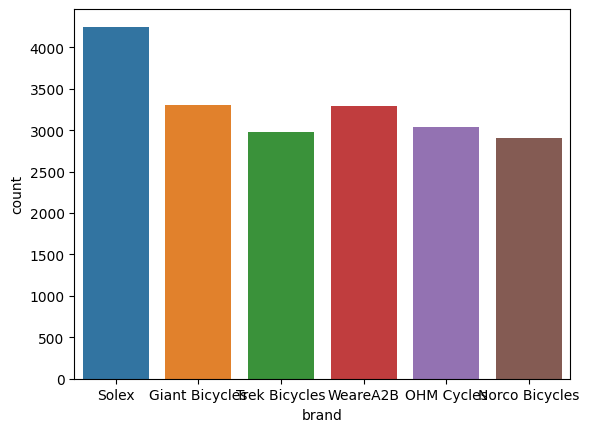

In [23]:
sns.countplot(x=df_merged['brand'])

<Axes: xlabel='job_industry_category', ylabel='count'>

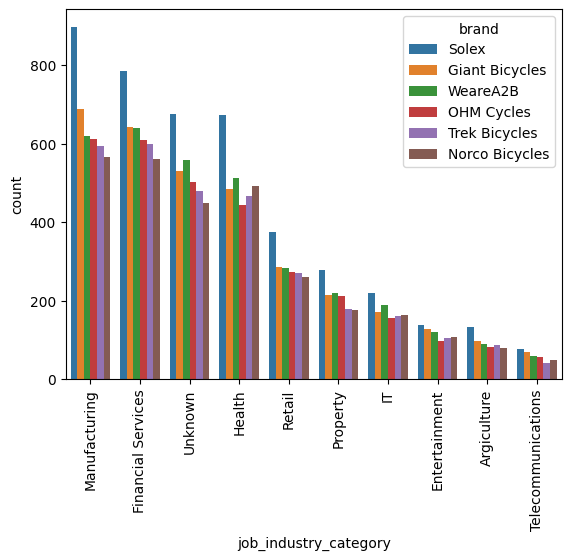

In [28]:
chart4 = sns.countplot(x= df_merged['job_industry_category'], hue = df_merged['brand'], order= df_merged['job_industry_category'].value_counts().index, hue_order=df_merged['brand'].value_counts(ascending=False).index)
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=90)
chart4

<Axes: xlabel='state', ylabel='count'>

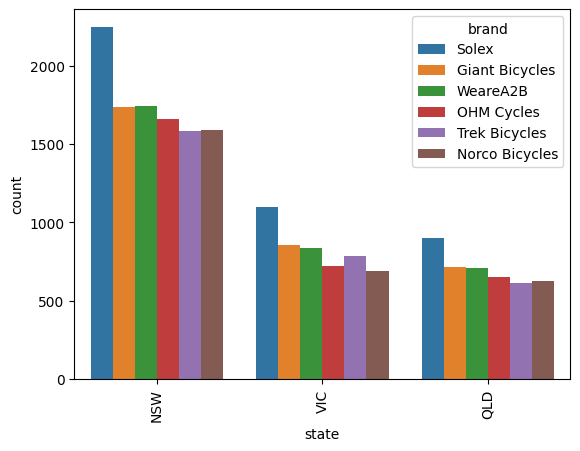

In [32]:
chart4 = sns.countplot(x= df_merged['state'], hue = df_merged['brand'], order= df_merged['state'].value_counts().index, hue_order=df_merged['brand'].value_counts(ascending=False).index)
chart4.set_xticklabels(chart4.get_xticklabels(), rotation=90)
chart4